## 1.Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 100

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,RepeatedKFold,cross_val_predict
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

## 2.Loading the Data

In [6]:
df_train=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/spaceship_titanic/train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df_train.shape

(8693, 14)

In [8]:
df_test=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/spaceship_titanic/test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
df_test.shape

(4277, 13)

## 3.Exploratory Data Analysis

We will combine both train and test datasets for performing the EDA. While model building we can separate it.

In [10]:
df_train['source']='train'
df_test['source']='test'

df_titanic=pd.concat([df_train,df_test],ignore_index=True)

In [11]:
df_titanic.shape

(12970, 15)

In [12]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  source        12970 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.5+ MB


In [13]:
df_titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [14]:
df_titanic.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported,source
count,12970,12682,12660,12671,12696,12674,12676,8693,12970
unique,12970,3,2,9825,3,2,12629,2,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Carry Contrevins,True,train
freq,1,6865,8079,8,8871,12401,2,4378,8693


In [15]:
#Checking the target column for true and false cases

In [16]:
df_titanic.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [17]:
num_features=df_titanic.select_dtypes(include=np.number)
num_features.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [18]:
#We will convert the numerical columns into categorical by creating bins so that we can treat the outliers.

In [19]:
df_titanic['Age_cat']=pd.cut(df_titanic.Age,bins=[-1,30,60,80],labels=['young','middle','old'])

In [20]:
df_titanic.Age_cat.value_counts()

young     7658
middle    4715
old        327
Name: Age_cat, dtype: int64

In [21]:
df_titanic=df_titanic.drop('Age',axis=1)

In [22]:
df_titanic['RoomService_cat']=pd.cut(df_titanic.RoomService,bins=[-1,0,1000,5000,14330],labels=['NoRoomService','Basic','Special','Premium'])

In [23]:
df_titanic.RoomService_cat.value_counts()

NoRoomService    8303
Basic            3488
Special           880
Premium            36
Name: RoomService_cat, dtype: int64

In [24]:
df_titanic['FoodCourt_cat']=pd.cut(df_titanic.FoodCourt,bins=[-1,0,5000,30000],labels=['health_freak','health_conscious','foodie'])

In [25]:
df_titanic.FoodCourt_cat.value_counts()

health_freak        8146
health_conscious    4263
foodie               272
Name: FoodCourt_cat, dtype: int64

In [26]:
df_titanic['ShoppingMall_cat']=pd.cut(df_titanic.ShoppingMall,bins=[-1,0,4000,25000],labels=['thrift','mredium','enthusiast'])

In [27]:
df_titanic.ShoppingMall_cat.value_counts()

thrift        8331
mredium       4287
enthusiast      46
Name: ShoppingMall_cat, dtype: int64

In [28]:
df_titanic['Spa_cat']=pd.cut(df_titanic.Spa,bins=[-1,0,8000,25000],labels=['low_spend','medium_spend','high_spend'])

In [29]:
df_titanic.Spa_cat.value_counts()

low_spend       7935
medium_spend    4692
high_spend        59
Name: Spa_cat, dtype: int64

In [30]:
df_titanic['VRDeck_cat']=pd.cut(df_titanic.VRDeck,bins=[-1,0,6000,25000],labels=['low','medium','high'])

In [31]:
df_titanic.VRDeck_cat.value_counts()

low       8252
medium    4329
high       121
Name: VRDeck_cat, dtype: int64

In [32]:
#We will drop the numerical columns which we would not require for our model building

In [33]:
df_titanic=df_titanic.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],axis=1)

In [34]:
df_titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported,source,Age_cat,RoomService_cat,FoodCourt_cat,ShoppingMall_cat,Spa_cat,VRDeck_cat
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False,train,middle,NoRoomService,health_freak,thrift,low_spend,low
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True,train,young,Basic,health_conscious,mredium,medium_spend,medium
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False,train,middle,Basic,health_conscious,thrift,medium_spend,medium
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False,train,middle,NoRoomService,health_conscious,mredium,medium_spend,medium
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True,train,young,Basic,health_conscious,mredium,medium_spend,medium


In [35]:
#We will set the categorical columns as object columns.

cols=['Age_cat','RoomService_cat','FoodCourt_cat','ShoppingMall_cat','Spa_cat','VRDeck_cat']

for col in cols:
    df_titanic[col]=df_titanic[col].astype('object')

In [36]:
#Finding the Missing Values and Treating them

In [37]:
df_titanic.isnull().sum()

PassengerId            0
HomePlanet           288
CryoSleep            310
Cabin                299
Destination          274
VIP                  296
Name                 294
Transported         4277
source                 0
Age_cat              270
RoomService_cat      263
FoodCourt_cat        289
ShoppingMall_cat     306
Spa_cat              284
VRDeck_cat           268
dtype: int64

In [38]:
#Since we have all our features as categorical data, we can replace the missing values by mode of the respective feature

In [39]:
cols=['HomePlanet','CryoSleep','Cabin','Destination','VIP','Age_cat','RoomService_cat','FoodCourt_cat','ShoppingMall_cat','Spa_cat','VRDeck_cat']

for col in cols:
    df_titanic[col]=df_titanic[col].fillna(df_titanic[col].mode()[0])

In [40]:
#we will drop the Name column since we donot require it for model building

df_titanic=df_titanic.drop(['Name','Cabin'],axis=1)

In [45]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PassengerId       12970 non-null  object
 1   HomePlanet        12970 non-null  object
 2   CryoSleep         12970 non-null  object
 3   Destination       12970 non-null  object
 4   VIP               12970 non-null  object
 5   Transported       12970 non-null  bool  
 6   source            12970 non-null  object
 7   Age_cat           12970 non-null  object
 8   RoomService_cat   12970 non-null  object
 9   FoodCourt_cat     12970 non-null  object
 10  ShoppingMall_cat  12970 non-null  object
 11  Spa_cat           12970 non-null  object
 12  VRDeck_cat        12970 non-null  object
dtypes: bool(1), object(12)
memory usage: 1.2+ MB


In [42]:
df_titanic['CryoSleep']=df_titanic['CryoSleep'].astype('object')
df_titanic['VIP']=df_titanic['VIP'].astype('object')

In [43]:
#Level Encoding of Target Variable

In [44]:
df_titanic['Transported']=df_titanic['Transported'].astype('bool')

In [46]:
df_titanic.Transported.value_counts()

True     8655
False    4315
Name: Transported, dtype: int64

In [47]:
df_titanic['Transported']=df_titanic.Transported.map({True:1,False:0})

In [48]:
df_titanic.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,source,Age_cat,RoomService_cat,FoodCourt_cat,ShoppingMall_cat,Spa_cat,VRDeck_cat
0,0001_01,Europa,False,TRAPPIST-1e,False,0,train,middle,NoRoomService,health_freak,thrift,low_spend,low
1,0002_01,Earth,False,TRAPPIST-1e,False,1,train,young,Basic,health_conscious,mredium,medium_spend,medium
2,0003_01,Europa,False,TRAPPIST-1e,True,0,train,middle,Basic,health_conscious,thrift,medium_spend,medium
3,0003_02,Europa,False,TRAPPIST-1e,False,0,train,middle,NoRoomService,health_conscious,mredium,medium_spend,medium
4,0004_01,Earth,False,TRAPPIST-1e,False,1,train,young,Basic,health_conscious,mredium,medium_spend,medium


In [76]:
df_titanic['Transported']=df_titanic['Transported'].astype('bool')

In [77]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PassengerId       12970 non-null  object
 1   HomePlanet        12970 non-null  object
 2   CryoSleep         12970 non-null  object
 3   Destination       12970 non-null  object
 4   VIP               12970 non-null  object
 5   Transported       12970 non-null  bool  
 6   source            12970 non-null  object
 7   Age_cat           12970 non-null  object
 8   RoomService_cat   12970 non-null  object
 9   FoodCourt_cat     12970 non-null  object
 10  ShoppingMall_cat  12970 non-null  object
 11  Spa_cat           12970 non-null  object
 12  VRDeck_cat        12970 non-null  object
dtypes: bool(1), object(12)
memory usage: 1.2+ MB


In [78]:
df_titanic1=df_titanic.copy(deep=True)

In [79]:
#One Hot Encoding for other Independent Variables

## 4.Separating the train and test set

In [80]:
df_train=df_titanic1.loc[df_titanic1['source']=='train']
df_test=df_titanic1.loc[df_titanic1['source']=='test']

In [81]:
df_test

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,source,Age_cat,RoomService_cat,FoodCourt_cat,ShoppingMall_cat,Spa_cat,VRDeck_cat
8693,0013_01,Earth,True,TRAPPIST-1e,False,True,test,young,NoRoomService,health_freak,thrift,low_spend,low
8694,0018_01,Earth,False,TRAPPIST-1e,False,True,test,young,NoRoomService,health_conscious,thrift,medium_spend,low
8695,0019_01,Europa,True,55 Cancri e,False,True,test,middle,NoRoomService,health_freak,thrift,low_spend,low
8696,0021_01,Europa,False,TRAPPIST-1e,False,True,test,middle,NoRoomService,foodie,thrift,medium_spend,medium
8697,0023_01,Earth,False,TRAPPIST-1e,False,True,test,young,Basic,health_freak,mredium,low_spend,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,TRAPPIST-1e,False,True,test,middle,NoRoomService,health_freak,thrift,low_spend,low
12966,9269_01,Earth,False,TRAPPIST-1e,False,True,test,middle,NoRoomService,health_conscious,mredium,medium_spend,medium
12967,9271_01,Mars,True,55 Cancri e,False,True,test,young,NoRoomService,health_freak,thrift,low_spend,low
12968,9273_01,Europa,False,TRAPPIST-1e,False,True,test,young,NoRoomService,health_conscious,thrift,low_spend,medium


In [82]:
df_train1=df_train.drop(['source','PassengerId'],axis=1)
df_test1=df_test.drop(['source','Transported','PassengerId'],axis=1)

In [83]:
df_train1.shape

(8693, 11)

In [84]:
df_test1.shape

(4277, 10)

In [85]:
df_train1_dummy=pd.get_dummies(df_train1,drop_first=True)

In [86]:
df_train1_dummy.shape

(8693, 20)

In [87]:
df_test1_dummy=pd.get_dummies(df_test1,drop_first=True)

In [88]:
df_test1_dummy.shape

(4277, 19)

## 5.Splitting the data into X_train,y_train

In [89]:
df_train1.head()

,HomePlanet,CryoSleep,Destination,VIP,Transported,Age_cat,RoomService_cat,FoodCourt_cat,ShoppingMall_cat,Spa_cat,VRDeck_cat
0,Europa,False,TRAPPIST-1e,False,False,middle,NoRoomService,health_freak,thrift,low_spend,low
1,Earth,False,TRAPPIST-1e,False,True,young,Basic,health_conscious,mredium,medium_spend,medium
2,Europa,False,TRAPPIST-1e,True,False,middle,Basic,health_conscious,thrift,medium_spend,medium
3,Europa,False,TRAPPIST-1e,False,False,middle,NoRoomService,health_conscious,mredium,medium_spend,medium
4,Earth,False,TRAPPIST-1e,False,True,young,Basic,health_conscious,mredium,medium_spend,medium


In [90]:
X_train=df_train1_dummy.drop(['Transported'],axis=1)
X_train.shape

(8693, 19)

In [91]:
y_train=df_train1_dummy['Transported']
y_train.shape

(8693,)

In [92]:
X_test=df_test1_dummy

In [93]:
X_test.shape

(4277, 19)

## 6.Data Scaling

In [94]:
#Scaling the data

In [95]:
sc=StandardScaler()

In [96]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

## 7.Model Building

In [97]:
#Model Building

### 1.LogisticRegression

In [98]:
lr=LogisticRegression()

In [99]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [100]:
predicted_train_result=lr.predict(X_train_scaled)
predicted_test_result=lr.predict(X_test_scaled)

In [101]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.7496836535143219


In [102]:
submit_lr=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [103]:
submit_lr.to_csv('spaceship_titanic.submit_lr.csv',index=False)

### 2.DecisionTreeClassifier

In [104]:
dt=DecisionTreeClassifier()

In [105]:
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [106]:
predicted_train_result=dt.predict(X_train_scaled)
predicted_test_result=dt.predict(X_test_scaled)

In [107]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.772115495226044


In [108]:
submit_dt=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [109]:
submit_dt.to_csv('spaceship_titanic.submit_dt.csv',index=False)

### 3.RandomForestClassifier

In [110]:
rf=RandomForestClassifier()

In [111]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [112]:
predicted_train_result=rf.predict(X_train_scaled)
predicted_test_result=rf.predict(X_test_scaled)

In [113]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.772115495226044


In [114]:
submit_rf=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [115]:
submit_rf.to_csv('spaceship_titanic.submit_rf.csv',index=False)

### 4.GridSearchCV using RF as base model

In [116]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [117]:
gs_model=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [118]:
gs_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [119]:
print('Best parameters are: ',gs_model.best_params_)

Best parameters are:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 85}


In [120]:
#Rebuilding the RF model with these parameters

In [121]:
rf1=RandomForestClassifier(n_estimators=85,min_samples_split=15,max_depth=10)

In [122]:
rf1.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=15, n_estimators=85)

In [123]:
predicted_train_result=rf1.predict(X_train_scaled)
predicted_test_result=rf1.predict(X_test_scaled)

In [124]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.7634878637984586


In [125]:
#We can see that the results the training accuracy score with our base RF model was better than th eone using hyperparameters.

In [126]:
submit_rf_with_GridSearchCV=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [127]:
submit_rf_with_GridSearchCV.to_csv('spaceship_titanic.submit_rf_with_GridSearchCV.csv',index=False)

### 5.XGBClassifier

In [128]:
xgb=XGBClassifier()

In [129]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [130]:
predicted_train_result=xgb.predict(X_train_scaled)
predicted_test_result=xgb.predict(X_test_scaled)

In [131]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.7693546531692166


In [132]:
submit_XGB=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [133]:
submit_XGB.to_csv('spaceship_titanic.submit_XGB.csv',index=False)

### 6.BaggingClassifier with Repeated CV

In [134]:
br=BaggingClassifier()

In [135]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [136]:
n_scores=cross_val_score(br,X_train,y_train,scoring='accuracy',cv=cv)

In [137]:
print('Training accuracy score is:',(np.mean(n_scores),np.std(n_scores)))

Training accuracy score is: (0.7397512444391535, 0.015038561376193688)


In [138]:
br.fit(X_train,y_train)

BaggingClassifier()

In [139]:
predicted_test_result=br.predict(X_test)

In [140]:
submit_br_with_repeated_CV=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [141]:
submit_br_with_repeated_CV.to_csv('spaceship_titanic.submit_br_with_repeated_CV.csv',index=False)

### 7.KNeighborsClassifier

In [142]:
k_values=range(3,21)

In [143]:
train_accuracy={}

In [144]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    predicted_train_result=knn.predict(X_train_scaled)
    predicted_test_result=knn.predict(X_test_scaled)
    train_accuracy[k]=accuracy_score(y_train,predicted_train_result)

In [145]:
max(train_accuracy.values())

0.7556654779707811

In [146]:
train_accuracy

{3: 0.726561601288393,
 4: 0.7277119521454043,
 5: 0.7512941447141378,
 6: 0.7338088116875647,
 7: 0.7517542850569424,
 8: 0.7534798113424594,
 9: 0.7533647762567584,
 10: 0.7508340043713333,
 11: 0.7535948464281605,
 12: 0.754745197285172,
 13: 0.7535948464281605,
 14: 0.7549752674565743,
 15: 0.7552053376279765,
 16: 0.7552053376279765,
 17: 0.7553203727136777,
 18: 0.7556654779707811,
 19: 0.7554354077993788,
 20: 0.7548602323708731}

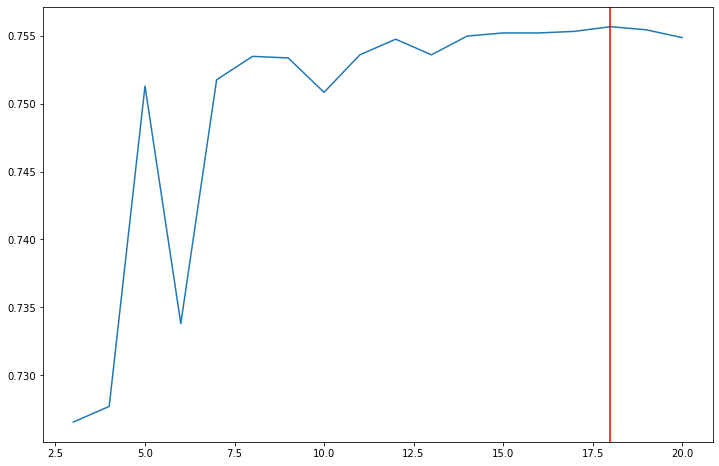

In [147]:
plt.figure(figsize=(12,8))
plt.plot(list(train_accuracy.keys()),list(train_accuracy.values()))
plt.axvline(x=18,color='red')    # Since the accuracy score is maximum for k=18
plt.show()

In [148]:
knn=KNeighborsClassifier(n_neighbors=18)

In [149]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=18)

In [150]:
predicted_train_result=knn.predict(X_train_scaled)
predicted_test_result=knn.predict(X_test_scaled)

In [151]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.7556654779707811


In [152]:
submit_knn=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [153]:
submit_knn.to_csv('spaceship_titanic.submit_knn.csv',index=False)

### 8.RFE and model building using KNN

In [154]:
rf1=RandomForestClassifier()

In [155]:
rfe=RFE(estimator=rf,n_features_to_select=16,verbose=1)
rfe.fit(X_train_scaled,y_train)

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=16, verbose=1)

In [156]:
print(X_train.columns[rfe.support_])

Index(['HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Age_cat_young',
       'RoomService_cat_NoRoomService', 'RoomService_cat_Special',
       'FoodCourt_cat_health_conscious', 'FoodCourt_cat_health_freak',
       'ShoppingMall_cat_mredium', 'ShoppingMall_cat_thrift',
       'Spa_cat_low_spend', 'Spa_cat_medium_spend', 'VRDeck_cat_low',
       'VRDeck_cat_medium'],
      dtype='object')


In [157]:
print(X_train.columns[rfe.ranking_])

Index(['HomePlanet_Mars', 'HomePlanet_Mars', 'HomePlanet_Mars',
       'HomePlanet_Mars', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'HomePlanet_Mars', 'HomePlanet_Mars',
       'Destination_TRAPPIST-1e', 'HomePlanet_Mars', 'HomePlanet_Mars',
       'HomePlanet_Mars', 'HomePlanet_Mars', 'HomePlanet_Mars',
       'HomePlanet_Mars', 'HomePlanet_Mars', 'HomePlanet_Mars',
       'HomePlanet_Mars'],
      dtype='object')


In [158]:
col_rank=pd.DataFrame(list(zip(X_train.columns,rfe.ranking_)),columns=['col','rank'])
col_rank.sort_values('rank')              

,col,rank
0,HomePlanet_Europa,1
16,Spa_cat_medium_spend,1
15,Spa_cat_low_spend,1
14,ShoppingMall_cat_thrift,1
13,ShoppingMall_cat_mredium,1
12,FoodCourt_cat_health_freak,1
11,FoodCourt_cat_health_conscious,1
10,RoomService_cat_Special,1
17,VRDeck_cat_low,1
18,VRDeck_cat_medium,1


In [159]:
imp_cols=col_rank.loc[col_rank['rank']==1,'col']
imp_cols

0                  HomePlanet_Europa
1                    HomePlanet_Mars
2                     CryoSleep_True
3          Destination_PSO J318.5-22
4            Destination_TRAPPIST-1e
7                      Age_cat_young
8      RoomService_cat_NoRoomService
10           RoomService_cat_Special
11    FoodCourt_cat_health_conscious
12        FoodCourt_cat_health_freak
13          ShoppingMall_cat_mredium
14           ShoppingMall_cat_thrift
15                 Spa_cat_low_spend
16              Spa_cat_medium_spend
17                    VRDeck_cat_low
18                 VRDeck_cat_medium
Name: col, dtype: object

In [160]:
X_tr_subset=X_train[imp_cols]
X_ts_subset=X_test[imp_cols]

In [161]:
X_tr_scaled=sc.fit_transform(X_tr_subset)
X_ts_scaled=sc.transform(X_ts_subset)

In [162]:
k_values=range(3,21)

In [163]:
train_acc1={}

In [164]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr_scaled,y_train)
    predicted_train_result=knn.predict(X_tr_scaled)
    predicted_test_result=knn.predict(X_ts_scaled)
    train_acc1[k]=accuracy_score(y_train,predicted_train_result)

In [165]:
max(train_acc1.values())

0.7639480041412631

In [166]:
train_acc1

{3: 0.7262164960312896,
 4: 0.7319682503163465,
 5: 0.7508340043713333,
 6: 0.7355343379730818,
 7: 0.7577361095134015,
 8: 0.7392154607155182,
 9: 0.7552053376279765,
 10: 0.7326584608305533,
 11: 0.7509490394570344,
 12: 0.7615322673415391,
 13: 0.7545151271137697,
 14: 0.7624525480271482,
 15: 0.7603819164845278,
 16: 0.7636028988841597,
 17: 0.7575060393419993,
 18: 0.7639480041412631,
 19: 0.7586563901990107,
 20: 0.7624525480271482}

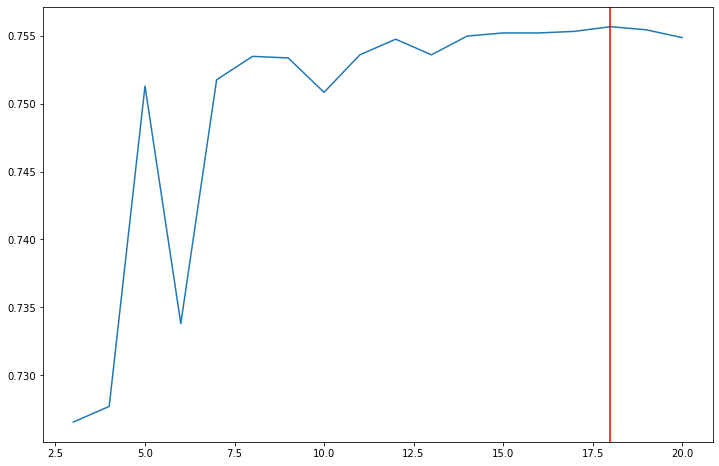

In [167]:
plt.figure(figsize=(12,8))
plt.plot(list(train_accuracy.keys()),list(train_accuracy.values()))
plt.axvline(x=18,color='red')    # Since the accuracy score is maximum for k=18
plt.show()

In [168]:
knn=KNeighborsClassifier(n_neighbors=18)

In [169]:
knn.fit(X_tr_scaled,y_train)

KNeighborsClassifier(n_neighbors=18)

In [170]:
predicted_train_result=knn.predict(X_tr_scaled)
predicted_test_result=knn.predict(X_ts_scaled)

In [171]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.7639480041412631


In [172]:
submit_knn_with_RFE=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [173]:
submit_knn_with_RFE.to_csv('spaceship_titanic.submit_knn_with_RFE.csv',index=False)

### 9.SupportVectormachine(SVC)

#### A.Kernel=Linear

In [174]:
svc1=SVC(kernel='linear')

In [175]:
svc1.fit(X_train,y_train)

SVC(kernel='linear')

In [176]:
predicted_train_result=svc1.predict(X_train)
predicted_test_result=svc1.predict(X_test)

In [177]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.7303577591165306


In [178]:
submit_svc_linear_kernel=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [179]:
submit_svc_linear_kernel.to_csv('spaceship_titanic.submit_svc_linear_kernel.csv',index=False)

#### B.Kernel=Radial(rbf)

In [180]:
svc2=SVC(kernel='rbf')

In [181]:
svc2.fit(X_train,y_train)

SVC()

In [182]:
predicted_train_result=svc2.predict(X_train)
predicted_test_result=svc2.predict(X_test)

In [183]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.756470723570689


In [184]:
submit_svc_rbf_kernel=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [185]:
submit_svc_rbf_kernel.to_csv('spaceship_titanic.submit_svc_rbf_kernel.csv',index=False)

#### C.Kernel=Sigmoid

In [186]:
svc3=SVC(kernel='sigmoid')

In [187]:
svc3.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [188]:
predicted_train_result=svc3.predict(X_train)
predicted_test_result=svc3.predict(X_test)

In [189]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.5403197975382492


In [190]:
submit_svc_sigmoid_kernel=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [191]:
submit_svc_sigmoid_kernel.to_csv('spaceship_titanic.submit_svc_sigmoid_kernel.csv',index=False)

#### D.Kernel=Poly

In [192]:
svc4=SVC(kernel='poly')

In [193]:
svc4.fit(X_train,y_train)

SVC(kernel='poly')

In [194]:
predicted_train_result=svc4.predict(X_train)
predicted_test_result=svc4.predict(X_test)

In [195]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.7569308639134936


In [196]:
submit_svc_poly_kernel=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [197]:
submit_svc_poly_kernel.to_csv('spaceship_titanic.submit_svc_poly_kernel.csv',index=False)

#### E.Kernel=Poly with GridSearchCV

In [198]:
#Tuning the parameters with GridSearchCV

In [199]:
param_grid={'degree':[2,4,6],'gamma':['auto','scale'],'C':[0.25,0.5,1]}

In [200]:
gs_model1=GridSearchCV(estimator=SVC(kernel='poly'),param_grid=param_grid,scoring='accuracy',cv=5)
gs_model1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.25, 0.5, 1], 'degree': [2, 4, 6],
                         'gamma': ['auto', 'scale']},
             scoring='accuracy')

In [201]:
print('Best Parameters are:',gs_model1.best_params_)

Best Parameters are: {'C': 0.25, 'degree': 4, 'gamma': 'scale'}


In [202]:
#Rebuilding the model with tuned parameters

svc5=SVC(kernel='poly',degree=4,gamma='scale',C=0.25)

In [203]:
svc5.fit(X_train,y_train)

SVC(C=0.25, degree=4, kernel='poly')

In [204]:
predicted_train_result=svc5.predict(X_train)
predicted_test_result=svc5.predict(X_test)

In [205]:
print('Training accuracy score is:',accuracy_score(y_train,predicted_train_result))

Training accuracy score is: 0.757275969170597


In [206]:
submit_svc_poly_kernel_with_GridSearchCV=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predicted_test_result})

In [207]:
submit_svc_poly_kernel_with_GridSearchCV.to_csv('spaceship_titanic.submit_svc_poly_kernel_with_GridSearchCV.csv',index=False)